# Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
a=pd.read_csv("questions.csv")

In [3]:
b=pd.read_csv("lectures.csv")

In [4]:
a.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [5]:
import seaborn as sns

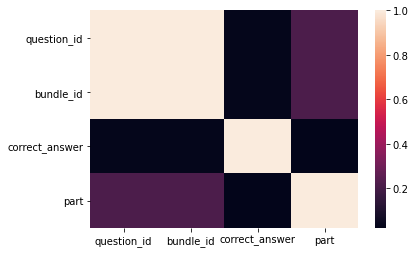

In [6]:
sns.heatmap(a.corr())

In [7]:
b.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


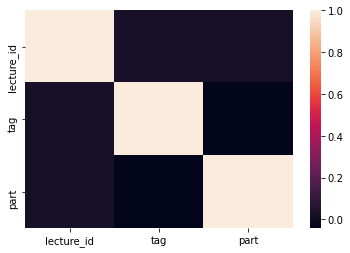

In [8]:
sns.heatmap(b.corr())

**Inference**- From both the heatmaps its clear that the features mostly related to the part they belong to.

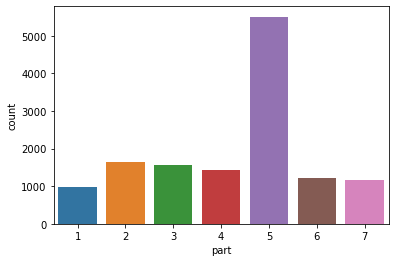

In [19]:
sns.countplot(x='part',data=a)

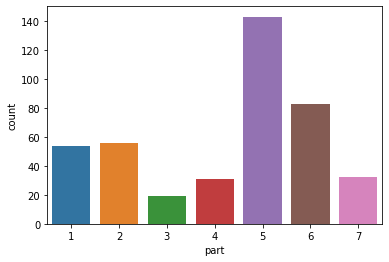

In [20]:
sns.countplot(x='part',data=b)

**Inference**- Bothe countplots depict that most of the questions are related to part 5 and are related to the lectures watched.

**Checking the tags properties**

In [9]:
a=a.dropna()

In [10]:
tags=[]
for i in a['tags']:
    for j in i.split(" "):
        if int(j) not in tags:
            tags.append(int(j))

In [11]:
print("Total number of tags present in the questions: ",len(tags))

Total number of tags present in the questions:  188


In [12]:
tags

[51,
 131,
 162,
 38,
 36,
 81,
 101,
 92,
 149,
 29,
 5,
 10,
 94,
 61,
 110,
 13,
 164,
 99,
 93,
 70,
 9,
 104,
 40,
 130,
 187,
 102,
 111,
 178,
 143,
 30,
 90,
 100,
 176,
 140,
 6,
 2,
 107,
 114,
 138,
 41,
 141,
 137,
 142,
 119,
 148,
 69,
 62,
 155,
 163,
 129,
 105,
 71,
 88,
 32,
 20,
 17,
 56,
 74,
 136,
 82,
 106,
 157,
 113,
 161,
 186,
 12,
 103,
 67,
 171,
 144,
 169,
 126,
 158,
 83,
 150,
 183,
 120,
 8,
 4,
 166,
 85,
 156,
 53,
 73,
 66,
 108,
 173,
 72,
 95,
 7,
 15,
 132,
 180,
 75,
 49,
 55,
 109,
 60,
 125,
 133,
 152,
 181,
 57,
 91,
 96,
 116,
 79,
 89,
 47,
 65,
 80,
 43,
 52,
 1,
 28,
 177,
 112,
 134,
 123,
 168,
 24,
 147,
 174,
 14,
 64,
 48,
 128,
 44,
 170,
 179,
 175,
 45,
 78,
 23,
 159,
 31,
 25,
 151,
 34,
 33,
 127,
 172,
 124,
 115,
 26,
 54,
 182,
 167,
 58,
 27,
 118,
 42,
 21,
 18,
 19,
 97,
 184,
 16,
 84,
 50,
 154,
 122,
 39,
 145,
 98,
 76,
 35,
 117,
 146,
 160,
 77,
 135,
 185,
 37,
 153,
 22,
 0,
 11,
 46,
 87,
 121,
 139,
 63,
 68,
 3

In [18]:
tag=int(input("Enter Tag: "))

if tag in b['tag']:
    print(b[b['tag']==tag][['type_of','part']])
else:
    print("No lecture")

Enter Tag: 93
             type_of  part
8            concept     1
73  solving question     1


# Checking if ML is appropriate for our prediction

In [2]:
data = pd.read_csv('train.csv')

In [22]:
data.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [3]:
data = data[['user_id','content_id','content_type_id','task_container_id','user_answer','answered_correctly',
            'prior_question_had_explanation']]

In [32]:
data.head()

,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_had_explanation
0,115,5692,0,1,3,1,NaN
1,115,5716,0,2,2,1,False
2,115,128,0,0,0,1,False
3,115,7860,0,3,0,1,False
4,115,7922,0,4,1,1,False


In [33]:
data['prior_question_had_explanation'] = data['prior_question_had_explanation'].fillna(False)

In [34]:
data.head()

,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_had_explanation
0,115,5692,0,1,3,1,False
1,115,5716,0,2,2,1,False
2,115,128,0,0,0,1,False
3,115,7860,0,3,0,1,False
4,115,7922,0,4,1,1,False


## Applying Feature Selection and training models

Here we are considering two scenarios, first we are considering that the users are watching lectures and in the second case the users are not watching any lectures.

### ANOVA

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [37]:
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['answered_correctly'], axis=1),
    data['answered_correctly'], test_size = 0.3, random_state = 0)

X_train.shape, X_test.shape

((70861232, 6), (30369100, 6))

In [39]:
univariate = f_classif(X_train, y_train)
univariate

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


(array([7.74952931e+00, 7.38154164e+06,            inf, 1.35038118e+05,
        3.01242512e+06, 6.86479211e+06]),
 array([0.00043095, 0.        , 0.        , 0.        , 0.        ,
        0.        ]))

In [40]:
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False, inplace=True)

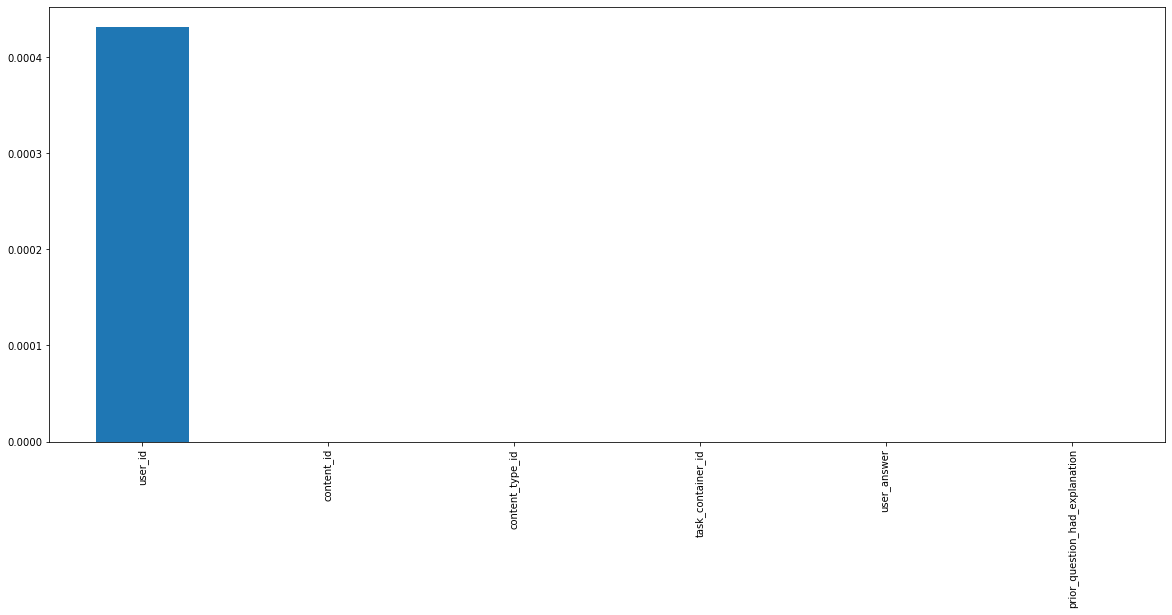

In [41]:
univariate.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [42]:
sel_ = SelectKBest(f_classif, k=5).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


Index(['content_id', 'content_type_id', 'task_container_id', 'user_answer',
       'prior_question_had_explanation'],
      dtype='object')

In [43]:
df1=data[['content_id', 'content_type_id', 'task_container_id', 'user_answer',
       'prior_question_had_explanation','answered_correctly']]
X_train, X_test, y_train, y_test = train_test_split(df1.drop(labels=['answered_correctly'], axis=1),
    df1['answered_correctly'], test_size = 0.3, random_state = 0)

X_train.shape, X_test.shape

((70861232, 5), (30369100, 5))

In [44]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [45]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [46]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,y_pred))

CONFUSION MATRIX
[[  586872        0        0]
 [       0  1413644  8795091]
 [       0  1455951 18117542]]


In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6624515708400973

In [48]:
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT")
print(classification_report(y_test,y_pred))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00    586872
           0       0.49      0.14      0.22  10208735
           1       0.67      0.93      0.78  19573493

    accuracy                           0.66  30369100
   macro avg       0.72      0.69      0.67  30369100
weighted avg       0.62      0.66      0.59  30369100



### Sequential Forward Selection

In [49]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['answered_correctly'], axis=1),
    data['answered_correctly'], test_size = 0.3, random_state = 0)

X_train.shape, X_test.shape

((70861232, 6), (30369100, 6))

In [51]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.naive_bayes import GaussianNB

sfs = SFS(GaussianNB(),
          k_features=5,
          forward=True,
          floating=False,
          scoring = 'accuracy',
          cv = 0)

sfs1 = sfs.fit(np.array(X_train.fillna(0)), y_train)

In [54]:
selected_feat= X_train.columns[list(sfs1.k_feature_idx_)]
selected_feat

Index(['content_id', 'content_type_id', 'task_container_id', 'user_answer',
       'prior_question_had_explanation'],
      dtype='object')

# Considering the questions only

In [3]:
data1=data[data['content_type_id']==0]
data1.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [4]:
data1 = data1[['user_id','content_id','content_type_id','task_container_id','user_answer','answered_correctly',
            'prior_question_had_explanation']]
data1['prior_question_had_explanation'] = data1['prior_question_had_explanation'].fillna(False)
data1.head()

,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_had_explanation
0,115,5692,0,1,3,1,False
1,115,5716,0,2,2,1,False
2,115,128,0,0,0,1,False
3,115,7860,0,3,0,1,False
4,115,7922,0,4,1,1,False


In [5]:
data1.isnull().sum()

user_id                           0
content_id                        0
content_type_id                   0
task_container_id                 0
user_answer                       0
answered_correctly                0
prior_question_had_explanation    0
dtype: int64

In [57]:
X_train, X_test, y_train, y_test = train_test_split(data1.drop(labels=['answered_correctly'], axis=1),
    data1['answered_correctly'], test_size = 0.3, random_state = 0)

X_train.shape, X_test.shape

((69489910, 6), (29781390, 6))

### ANOVA

In [8]:
from sklearn.feature_selection import f_classif, f_regression          
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1.drop(labels=['answered_correctly'], axis=1),
    data1['answered_correctly'], test_size = 0.3, random_state = 0)

X_train.shape, X_test.shape

In [ ]:
univariate = f_classif(X_train, y_train)
univariate

In [ ]:
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False, inplace=True)

In [ ]:
univariate.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [9]:
sel_ = SelectKBest(f_classif, k=5).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [2] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Index(['user_id', 'content_id', 'task_container_id', 'user_answer',
       'prior_question_had_explanation'],
      dtype='object')

In [7]:
from sklearn.model_selection import train_test_split
df4=data1[['user_id', 'content_id', 'task_container_id', 'user_answer',
       'prior_question_had_explanation', 'answered_correctly']]
X_train, X_test, y_train, y_test = train_test_split(df4.drop(labels=['answered_correctly'], axis=1),
    df4['answered_correctly'], test_size = 0.3, random_state = 0)

X_train.shape, X_test.shape

((69489910, 5), (29781390, 5))

In [8]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [9]:
x_df = pd.DataFrame(X_train)
x_df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [10]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [11]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,y_pred))

CONFUSION MATRIX
[[ 1412193  8798878]
 [ 1453918 18116401]]


In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6557314483978082

### Sequential Backward Elimination

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data1.drop(labels=['answered_correctly'], axis=1),
    data1['answered_correctly'], test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape

((69489910, 6), (29781390, 6))

In [8]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.naive_bayes import GaussianNB

sbs = SFS(GaussianNB(),
         k_features=5,
         forward=False,
         floating=False,
         cv=0)

sbs1 = sbs.fit(np.array(X_train.fillna(0)), y_train)

In [9]:
selected_feat= X_train.columns[list(sbs1.k_feature_idx_)]
selected_feat

Index(['user_id', 'content_id', 'content_type_id', 'task_container_id',
       'user_answer'],
      dtype='object')

**Inference**- From checking the accuracies we can conclude that even though including lectures in the dataset tends to increase the accuracy of the model, its tends to mislead us. This is because the lectures are included as -1 in the dataset which tends to be distinct from the other values of the answered_correctly attribute of the dataset and largely differs in size. 